In [14]:
# Required Python Machine learning Packages
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('income1.csv')
df.tail()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country,income
32556,27,Private,University,Married,Tech-support,White,Female,38,United-States,<=50K
32557,40,Private,College,Married,Sales,White,Male,40,United-States,>50K
32558,58,Private,College,Married,Tech-support,White,Female,40,United-States,<=50K
32559,22,Private,College,Single,Tech-support,White,Male,20,United-States,<=50K
32560,52,Self-emp,College,Married,Managerial,White,Female,40,United-States,>50K


In [16]:
df.isnull().sum()

age               0
workclass         0
education         0
marital_status    0
occupation        0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
for value in df:
    print(value, ":", sum(df[value] == '?'))

age : 0
workclass : 0
education : 0
marital_status : 0
occupation : 0
race : 0
sex : 0
hours_per_week : 0
native_country : 0
income : 0


In [18]:
categorical = [var for var in df.columns if df[var].dtype=='O']
for i in df[categorical]:
    print('\n', i, df[i].unique())


 workclass [' State-gov' ' Self-emp' ' Private' ' Not-worked']

 education [' Bachelors' ' College' ' High_school' ' Masters' ' Second_school'
 ' University' ' Doctorate' ' Primary_school']

 marital_status [' Single' ' Married' ' Others']

 occupation [' Tech-support' ' Managerial' ' Shipper' ' Others' ' Doctor' ' Sales'
 ' Protective-serv' ' Pilot']

 race [' White' ' Black' ' Yellow' ' Other']

 sex [' Male' ' Female']

 native_country [' United-States' ' India' ' Vietnam' ' China' ' Canada' ' Philippines'
 ' England' ' Germany' ' Japan']

 income [' <=50K' ' >50K']


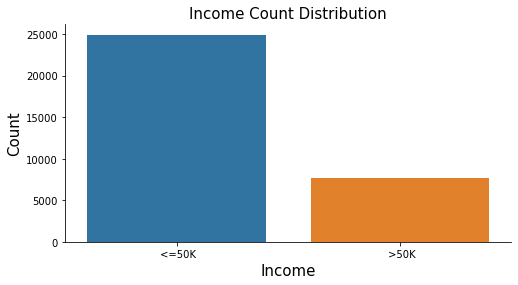

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.countplot(x = 'income', data = df)
ax.set_xlabel('Income', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Income Count Distribution', fontsize=15)
sns.despine()

In [20]:
#import LabelEncoder để chuyển giá trị chuỗi thành giá trị số 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

In [21]:
# chuyển string -> float
df['workclass'] = le.fit_transform(df.workclass)
df['education'] = le.fit_transform(df.education)
df['marital_status'] = le.fit_transform(df.marital_status)
df['occupation'] = le.fit_transform(df.occupation)
df['race'] = le.fit_transform(df.race)
df['sex'] = le.fit_transform(df.sex)
df['native_country'] = le.fit_transform(df.native_country)
df['income'] = le.fit_transform(df.income)

df.tail()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,native_country,income
32556,27,1,7,0,7,2,0,38,7,0
32557,40,1,1,0,5,2,1,40,7,1
32558,58,1,1,0,7,2,0,40,7,0
32559,22,1,1,2,7,2,1,20,7,0
32560,52,2,1,0,1,2,0,40,7,1


In [22]:
X = df.values[:, :-1]
y = df.values[:, 9]

In [23]:
#import train_test_split, size test = 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [24]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
train = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [25]:
import joblib
filename = "Completed_model1.joblib"
joblib.dump(model, filename)

['Completed_model1.joblib']

In [26]:
# To calculate the accuracy score of the model
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(f'Accuracy model: {accuracy_score(y_test, y_pred)* 100:.2f}%')

[[6765 1471]
 [ 727 1783]]
Accuracy model: 79.55%
